The goal of this notebook is to try a few things for the Kaggle's Titanic: Machine Learning from Disaster dataset. You can find the dataset and some information [here](https://www.kaggle.com/c/titanic). I use Python for this project. First, let's start by reading the dataset to see what we have:

In [4]:
import pandas as pd
directory = '../../Datasets/Titanic/'
titanic_train = pd.read_csv(directory + 'train.csv')
titanic_test = pd.read_csv(directory + 'test.csv')

In [3]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

There are some missing data in Age, Cabin, and Fare. Let's combine the training and test data and fill the missing data. For now, I'll use simple methods. We can improve them later. 

In [5]:
titanic_train_test = [titanic_train, titanic_test]

In [7]:
for dataset in titanic_train_test:
    dataset['Age'].fillna(dataset.Age.median(), inplace=True)
    dataset['Cabin'].fillna('U', inplace=True)
    dataset['Embarked'].fillna('S', inplace=True)
    dataset['Fare'].fillna(dataset.Fare.mean(), inplace=True)

In [8]:
titanic_train.info()
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null int64
CategoricalAge    891 non-null category
Title             891 non-null object
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 77.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age     

I'm going to define a few more columns for now. I define FamilySize (based on SibSp:# of siblings / spouses aboard the Titanic and Parch (of parents / children aboard the Titanic). 

In [9]:
for dataset in titanic_train_test:
    dataset['FamilySize'] = dataset.SibSp + dataset.Parch

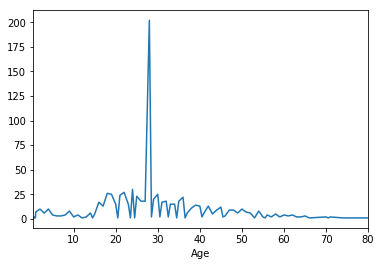

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline  
titanic_train.groupby('Age').count().PassengerId.plot()

It's better to group the ages so we have a better understanding of the groups. 

In [23]:
for dataset in titanic_train_test:
    dataset['AgeRange'], AgeBins = pd.cut(dataset['Age'], 10, retbins=True)

In [24]:
titanic_train.groupby('AgeRange').count().PassengerId

AgeRange
(0.34, 8.378]        54
(8.378, 16.336]      46
(16.336, 24.294]    177
(24.294, 32.252]    346
(32.252, 40.21]     118
(40.21, 48.168]      70
(48.168, 56.126]     45
(56.126, 64.084]     24
(64.084, 72.042]      9
(72.042, 80.0]        2
Name: PassengerId, dtype: int64

In [25]:
titanic_train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

We can extract titles and then use it instead of Sex. Actually, there is a clear correlation between Sex and Title (Male cannot use Mrs for title). So, it doesn't make sense to keep both. As the same time, I think Title shows more information than a binary Sex variable.

In [27]:
for dataset in titanic_train_test:
    dataset['Title'] = dataset['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())

In [28]:
titanic_train.Title.head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

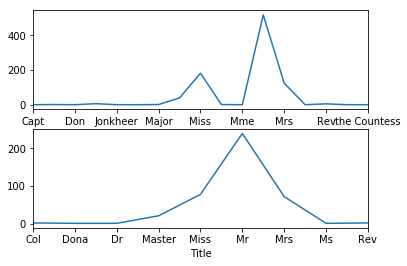

In [39]:
plt.subplot(2,1,1)
titanic_train.groupby('Title').count().PassengerId.plot()
plt.subplot(2,1,2)
titanic_test.groupby('Title').count().PassengerId.plot()

It make sense to just keep a few titles and get rid of the rare cases. 

In [40]:
Title_Dictionary = {
    "Capt": "Rare",
    "Col": "Rare",
    "Major": "Rare",
    "Jonkheer": "Rare",
    "Don": "Rare",
    "Sir": "Rare",
    "Dr": "Rare",
    "Rev": "Rare",
    "the Countess": "Rare",
    "Dona": "Rare",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Rare"
}
for dataset in titanic_train_test:
    dataset['Title'] = dataset['Title'].map(Title_Dictionary)

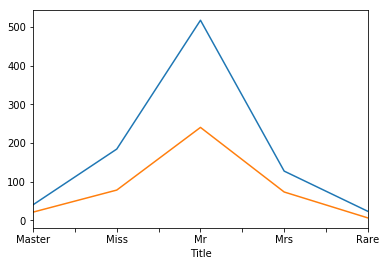

In [42]:
titanic_train.groupby('Title').count().PassengerId.plot()
titanic_test.groupby('Title').count().PassengerId.plot()

Let's see what we can get from last name. Basically, if we can use the same last name to distinguish people from the same family, it can be useful. The problem is that some last names are common and we should not use them (see max value is 9 in the training data).

In [43]:
for dataset in titanic_train_test:
    dataset['LastName'] = dataset['Name'].map(lambda name: name.split(',')[0].strip())

In [54]:
titanic_train.groupby('LastName').count().PassengerId.describe()


count    667.000000
mean       1.335832
std        0.854922
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        9.000000
Name: PassengerId, dtype: float64

In [55]:
titanic_test.groupby('LastName').count().PassengerId.describe()

count    352.000000
mean       1.187500
std        0.505314
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        4.000000
Name: PassengerId, dtype: float64

Let's investigate what we have from tickets, cabins, and fares. Remeber, 'U' in Cabin means unknown. The 687 value in the training data is for that one. For ticket, things are better. The max number of items with the same ticket is 7. Maybe we can use it to find groups. Obviously, same fare does not mean anything is most cases. But, it we have very few persons with the same fare, maybe they got their tickets together.

In [58]:
titanic_train.groupby('Cabin').count().PassengerId.describe()

count    148.000000
mean       6.020270
std       56.360775
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      687.000000
Name: PassengerId, dtype: float64

In [60]:
titanic_train.groupby('Ticket').count().PassengerId.describe()

count    681.000000
mean       1.308370
std        0.792652
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        7.000000
Name: PassengerId, dtype: float64

In [61]:
titanic_train.groupby('Fare').count().PassengerId.describe()

count    248.000000
mean       3.592742
std        5.848930
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       43.000000
Name: PassengerId, dtype: float64

I think we can find the frequencies of things now to see what are the distributions. 

In [63]:
for dataset in titanic_train_test:
    for col in ['Ticket', 'Cabin', 'Fare', 'LastName']:
        freq_col = f'Freq{col}'

        freq = dataset[col].value_counts().to_frame()
        freq.columns = [freq_col]

        dataset[freq_col] = dataset.merge(freq, how='left', left_on=col, right_index=True)[freq_col]

In [64]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null int64
CategoricalAge    891 non-null category
Title             891 non-null object
AgeCat            891 non-null category
AgeRange          891 non-null category
LastName          891 non-null object
FreqTicket        891 non-null int64
FreqCabin         891 non-null int64
FreqFare          891 non-null int64
FreqLastName      891 non-null int64
dtypes: category(3), float64(2), int64(10), object(7)
memory 

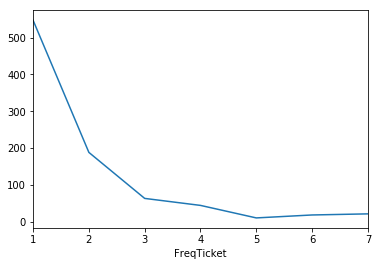

In [66]:
titanic_train.groupby('FreqTicket').count().PassengerId.plot()

In [71]:
titanic_train.groupby('FreqCabin').count().PassengerId

FreqCabin
1      101
2       76
3       15
4       12
687    687
Name: PassengerId, dtype: int64

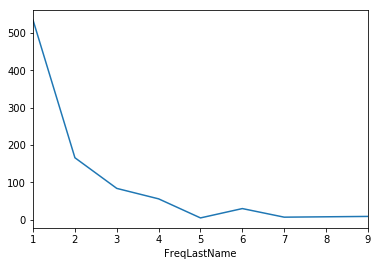

In [74]:
titanic_train.groupby('FreqLastName').count().PassengerId.plot()

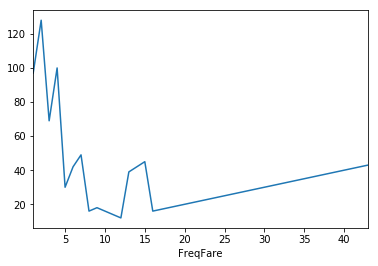

In [77]:
titanic_train.groupby('FreqFare').count().PassengerId.plot()

Now, we can group things together. I'm going to use FamilySize first, then FreqTicket, then FreqCabin and then FreqLastName. If there is nothing, then the passanger was alone.

In [78]:
def groupify(x):
    max_group = 5
    if x['FamilySize'] > 0:
        return x['FamilySize']
    elif x['FreqTicket'] > 1:
        return x['FreqTicket']
    elif x['FreqCabin'] > 1 and x['Cabin'] != 'U':
        return x['FreqCabin']
    elif 1 < x['FreqLastName'] < max_group:
        return x['FreqLastName']
    elif 1 < x['FreqFare'] < max_group:
        return x['FreqFare']
    else:
        return 0

In [79]:
for dataset in titanic_train_test:
    dataset['GroupSize'] = dataset.apply(groupify, axis=1)

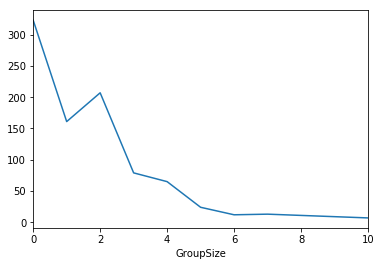

In [80]:
titanic_train.groupby('GroupSize').count().PassengerId.plot()

Let's see what we got finally:

In [83]:
print(titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())
print()
print(titanic_train[['GroupSize', 'Survived']].groupby(['GroupSize'], as_index=False).mean())
print()
print(titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())
print()
print(titanic_train[['AgeRange', 'Survived']].groupby(['AgeRange'], as_index=False).mean())
print()
print(titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
print()


   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

   GroupSize  Survived
0          0  0.241486
1          1  0.552795
2          2  0.439614
3          3  0.594937
4          4  0.384615
5          5  0.125000
6          6  0.333333
7          7  0.384615
8         10  0.000000

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

           AgeRange  Survived
0     (0.34, 8.378]  0.666667
1   (8.378, 16.336]  0.413043
2  (16.336, 24.294]  0.355932
3  (24.294, 32.252]  0.338150
4   (32.252, 40.21]  0.440678
5   (40.21, 48.168]  0.342857
6  (48.168, 56.126]  0.466667
7  (56.126, 64.084]  0.375000
8  (64.084, 72.042]  0.000000
9    (72.042, 80.0]  0.500000

    Title  Survived
0  Master  0.575000
1    Miss  0.701087
2      Mr  0.156673
3     Mrs  0.795276
4    Rare  0.347826



Let's remove the ununsed columns and clean the final dataset.

In [84]:
y = titanic_train['Survived']
titanic_train.drop(['Survived'], axis=1, inplace=True)

In [85]:
for dataset in titanic_train_test:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)

    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

    for AgeGroup in range(0, len(AgeBins)):
        if AgeGroup == len(AgeBins) - 1:
            dataset.loc[dataset['Age'] > AgeBins[AgeGroup], 'Age'] = AgeGroup
        else:
            dataset.loc[
                (dataset['Age'] > AgeBins[AgeGroup]) & (dataset['Age'] <= AgeBins[AgeGroup + 1]), 'Age'] = AgeGroup

    dataset["Pclass"] = dataset["Pclass"].astype('int')

    # Sex & Title have correclation. We keep Title.
    for col in dataset.columns:
        if col not in ['Pclass', 'Age', 'Embarked', 'Title', 'GroupSize']:
            dataset.drop([col], inplace=True, axis=1)
    for col in dataset.columns:
        dataset[col] = dataset[col].astype("category")

In [86]:
titanic_train.columns

Index(['Pclass', 'Age', 'Embarked', 'Title', 'GroupSize'], dtype='object')

As you can see, I almost remove all columns and kept the very few. I beleive that other columns are very related to the above ones and as such there will be correlation between them.

I'm going to make binary variables from these columns.

In [87]:
titanic_train = pd.get_dummies(titanic_train, columns=None)
titanic_test = pd.get_dummies(titanic_test, columns=None)

In [88]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
Pclass_1        891 non-null uint8
Pclass_2        891 non-null uint8
Pclass_3        891 non-null uint8
Age_0.0         891 non-null uint8
Age_1.0         891 non-null uint8
Age_2.0         891 non-null uint8
Age_3.0         891 non-null uint8
Age_4.0         891 non-null uint8
Age_5.0         891 non-null uint8
Age_6.0         891 non-null uint8
Age_7.0         891 non-null uint8
Age_8.0         891 non-null uint8
Age_9.0         891 non-null uint8
Age_10.0        891 non-null uint8
Embarked_0      891 non-null uint8
Embarked_1      891 non-null uint8
Embarked_2      891 non-null uint8
Title_1         891 non-null uint8
Title_2         891 non-null uint8
Title_3         891 non-null uint8
Title_4         891 non-null uint8
Title_5         891 non-null uint8
GroupSize_0     891 non-null uint8
GroupSize_1     891 non-null uint8
GroupSize_2     891 non-null uint8
GroupSize_3     891 

To make sure we are using the same feature sets for both train and test, I need to clean the dataset a little more.

In [89]:
missing_cols = set(titanic_train.columns) - set(titanic_test.columns)
for c in missing_cols:
    titanic_test[c] = 0
missing_cols = set(titanic_test.columns) - set(titanic_train.columns)
for c in missing_cols:
    titanic_test[c] = 0

In [90]:
X_train, y_train = titanic_train, y
X_test = titanic_test

I'm going to try a few classifiers with different paramters (cross validation)

In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set the parameters by cross-validation
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np

# run svm
C_range = np.logspace(-3, 3, 7)
gamma_range = np.logspace(-3, 3, 7)
param_grid = dict(gamma=gamma_range, C=C_range)
svm_model = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03]), 'C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
print("[SVM] The best parameters are %s with a score of %0.2f"
      % (svm_model.best_params_, svm_model.best_score_))

[SVM] The best parameters are {'C': 1.0, 'gamma': 0.10000000000000001} with a score of 0.82


Now, let's try Multi-layer Perceptron.

In [95]:
from sklearn.neural_network import MLPClassifier

# MLP
alpha_range = np.logspace(-3, 3, 7)
param_grid = dict(alpha=alpha_range)
mlp = GridSearchCV(MLPClassifier(solver='lbfgs'), param_grid=param_grid, cv=cv)
mlp.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print("[MLP] The best parameters are %s with a score of %0.2f"
      % (mlp.best_params_, mlp.best_score_))

[MLP] The best parameters are {'alpha': 10.0} with a score of 0.81


In [97]:
from sklearn.tree import DecisionTreeClassifier

# Tree
max_depth_range = np.linspace(10, 15, 6).astype(int)
min_samples_split_range = np.linspace(2, 5, 4).astype(int)
param_grid = dict(max_depth=max_depth_range, min_samples_split=min_samples_split_range)
clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=cv)
clf.fit(X_train, y_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([10, 11, 12, 13, 14, 15]), 'min_samples_split': array([2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [98]:
print("[TREE] The best parameters are %s with a score of %0.2f"
      % (clf.best_params_, clf.best_score_))

[TREE] The best parameters are {'max_depth': 10, 'min_samples_split': 3} with a score of 0.81


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
param_grid = {"n_estimators": [250, 300],
              "criterion": ["gini", "entropy"],
              "max_depth": [10, 15, 20],
              "min_samples_split": [2, 3, 4]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
forest = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv, verbose=2)
forest.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=10, min_samples_split=2, n_estimators=300, total=   0.6s
[CV] criterion=gini, max_depth=10, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, 

[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=250 
[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=250 
[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=250, total=   0.5s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300, total=   0.6s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300, total=   0.6s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300, total=   0.7s
[CV] criterion=gini, max_depth=15, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, 

[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=250 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=250 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300 
[CV]  criterion=entropy, max_depth=10, min_samples_split=3, n_estimators=300, total=   0.9s
[CV] criterion=entropy, max_depth=10, min_samples_split=3, n_es

[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250 
[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250 
[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250 
[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=250, total=   0.7s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=300 
[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=300, total=   0.9s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=300 
[CV]  criterion=entropy, max_depth=20, min_samples_split=2, n_estimators=300, total=   0.8s
[CV] criterion=entropy, max_depth=20, min_samples_split=2, n_es

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.6min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [250, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 15, 20], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [101]:
print("[FOREST] The best parameters are %s with a score of %0.2f"
      % (forest.best_params_, forest.best_score_))

[FOREST] The best parameters are {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 300} with a score of 0.82


So, it seems the random foret is the best one. We can write it down to a csv file.

In [102]:
out_df = pd.DataFrame(
    {'PassengerId': pd.read_csv(directory + 'test.csv').PassengerId, 'Survived': forest.predict(X_test)}).to_csv(
    'out_forest.csv', header=True, index=False)